In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Data analysis

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
x_train[0].shape

(28, 28)

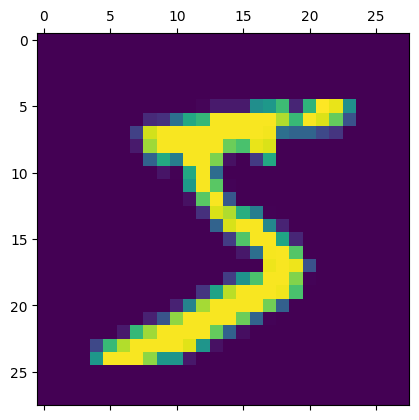

In [ ]:
plt.matshow(x_train[0])

In [ ]:
y_train[0]

np.uint8(5)

Data Manipulation

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train_1d = x_train.reshape(len(x_train), 28*28)
x_train_1d.shape

(60000, 784)

In [ ]:
x_test_1d = x_test.reshape(len(x_test), 28*28)
x_test_1d.shape

(10000, 784)

**Neural Network**

Training

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

model.fit(x_train_1d, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8092 - loss: 0.7237
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9155 - loss: 0.3075
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9224 - loss: 0.2816
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9229 - loss: 0.2727
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9253 - loss: 0.2680


Testing

In [ ]:
model.evaluate(x_test_1d, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9142 - loss: 0.3027


[0.26808685064315796, 0.9258000254631042]

Manual test

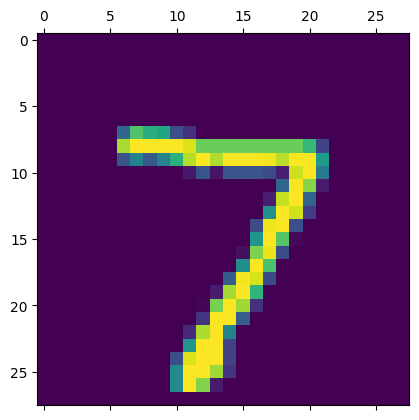

In [ ]:
plt.matshow(x_test[0])

In [ ]:
predictions = model.predict(x_test_1d)
prediction = np.argmax(predictions[0])
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


np.int64(7)

Confusion Matrix

In [ ]:
predicted_labels = [np.argmax(i) for i in predictions]
predicted_labels[:10]

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(9)]

In [ ]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    1,    0,    4,    7,    3,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   8,    9,  923,   15,    7,    5,   13,   11,   38,    3],
       [   4,    0,   18,  904,    0,   38,    2,   12,   25,    7],
       [   2,    1,    2,    1,  920,    0,   11,    4,   11,   30],
       [   9,    3,    3,   19,    8,  798,   13,    6,   27,    6],
       [   9,    3,    7,    1,    8,   14,  912,    2,    2,    0],
       [   1,    6,   21,    6,    7,    0,    0,  953,    4,   30],
       [   8,   11,    6,   17,    9,   41,    9,   12,  854,    7],
       [  11,    7,    1,    9,   26,    9,    0,   29,    4,  913]],
      dtype=int32)>

Text(58.222222222222214, 0.5, 'Truth')

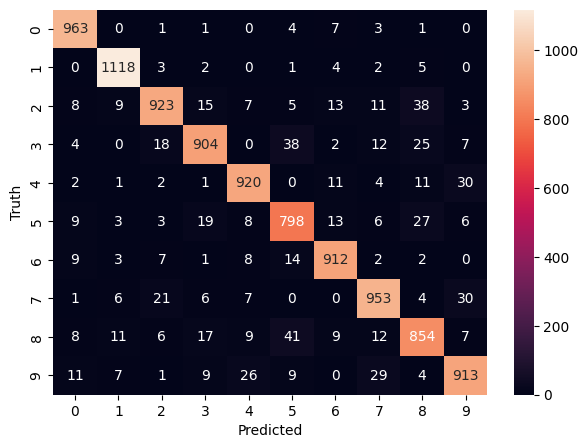

In [ ]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Attempt to improve Neural Network**

Training

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

model.fit(x_train_1d, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8698 - loss: 0.4597
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9625 - loss: 0.1300
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9725 - loss: 0.0911
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9803 - loss: 0.0641
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9861 - loss: 0.0479


Testing

In [ ]:
model.evaluate(x_test_1d, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9718 - loss: 0.0929


[0.07891015708446503, 0.9760000109672546]

In [ ]:
predictions = model.predict(x_test_1d)
predicted_labels = [np.argmax(i) for i in predictions]
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(58.222222222222214, 0.5, 'Truth')

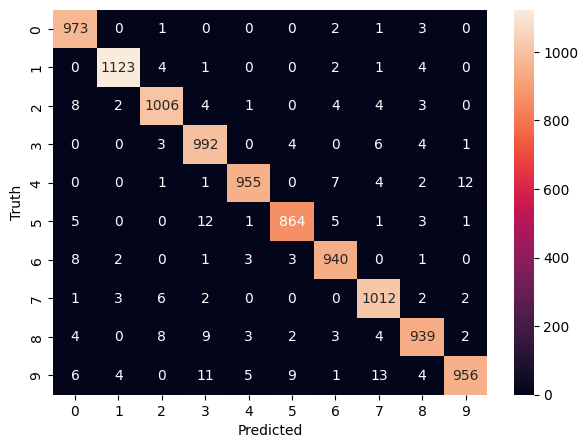

In [ ]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')